## Mushroom Classification - Kaggle

- https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison

In [1]:
# Importing all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mushrooms/mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
# Let us check if there is any null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
data['class'].unique()

# Thus we have two claasification. Either the mushroom is poisonous or edible

array(['p', 'e'], dtype=object)

In [5]:
data.shape

# Thus we have 22 features (1st one is label) and 8124 instances.

(8124, 23)

In [6]:
# We can see that the dataset has values in strings.
# We need to convert all the unique values to integers.
# Thus we perform label encoding on the data.

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
# Checking the encoded values

data['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8], dtype=int64)

In [8]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


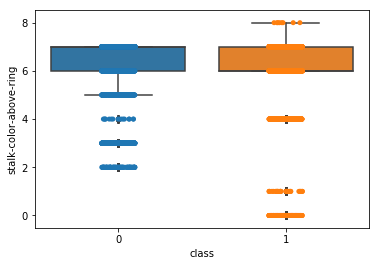

In [9]:
# Plotting boxplot to see the distribution of the data

'''
# Create a figure instance
fig, axes = plt.subplots(nrows=2 ,ncols=2 ,figsize=(9, 9))

# Create an axes instance and the boxplot
bp1 = axes[0,0].boxplot(data['stalk-color-above-ring'],patch_artist=True)

bp2 = axes[0,1].boxplot(data['stalk-color-below-ring'],patch_artist=True)

bp3 = axes[1,0].boxplot(data['stalk-surface-below-ring'],patch_artist=True)

bp4 = axes[1,1].boxplot(data['stalk-surface-above-ring'],patch_artist=True)
'''

ax = sns.boxplot(x='class', y='stalk-color-above-ring', data=data)
ax = sns.stripplot(x="class", y='stalk-color-above-ring', data=data, jitter=True, edgecolor="gray")

#sns.plt.title("Class w.r.t stalkcolor above ring", fontsize=12)

In [10]:
# Separating features and label

X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only

print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [11]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [12]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [13]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [14]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [15]:
# Standardising the data

# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

print(X)

[[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


In [16]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
pca = PCA()

pca.fit_transform(X)

# Note: We can avoid PCA here since the dataset is very small.

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -5.57315861e-18],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  1.52436867e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  6.76228279e-18],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  2.45541518e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -1.39487820e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  2.60366835e-20]])

In [17]:
covariance = pca.get_covariance()
covariance

array([[ 1.00012311e+00, -5.04598689e-02, -4.82087723e-02,
        -3.53784857e-02, -2.19379500e-02,  7.88747759e-02,
         1.31976727e-02,  5.40569473e-02, -6.03950664e-03,
         6.38020697e-02,  3.01947722e-02, -3.04209144e-02,
        -3.25951166e-02, -3.16631918e-02, -3.03935589e-02,
         2.27673502e-19,  7.25693997e-02, -1.06546915e-01,
        -2.54597238e-02, -7.34245762e-02,  6.34209571e-02,
        -4.22261061e-02],
       [-5.04598689e-02,  1.00012311e+00, -1.94041011e-02,
         7.02370673e-02,  4.52388718e-02, -3.41840973e-02,
        -2.82340541e-01,  2.08125459e-01, -1.61037318e-01,
        -1.41243642e-02, -1.26260048e-01,  8.91013054e-02,
         1.07977800e-01,  6.60584116e-02,  6.88933788e-02,
         3.67656265e-17, -1.66054596e-02, -2.61503505e-02,
        -1.06420046e-01,  2.30392413e-01,  2.15577812e-02,
         1.63906824e-01],
       [-4.82087723e-02, -1.94041011e-02,  1.00012311e+00,
        -7.64543349e-04, -3.87168603e-01,  4.14406892e-02,
    

In [18]:
explained_variance = pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 9.68748183e-35])

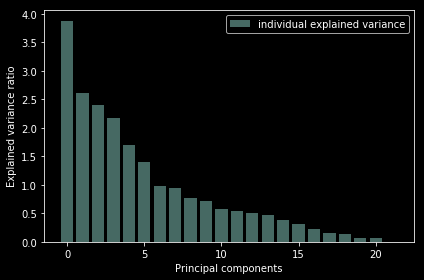

In [19]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
# We can see that the last 4 components has less amount of variance of the data.
# The 1st 17 components retains more than 90% of the data.

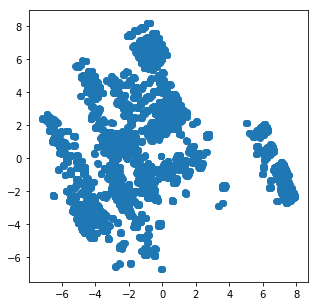

In [20]:
# Let us take only first two principal components and visualise it using K-means clustering

N = data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

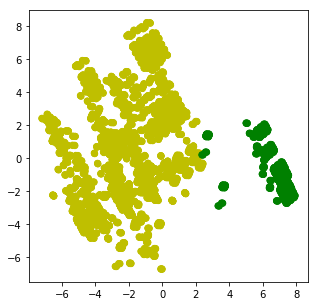

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

# Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance.

In [22]:
# Performing PCA by taking 17 components with maximum Variance

pca_modified = PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [23]:
# Splitting the data into training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


In [24]:
# 1) Default Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# This will give you positive class prediction probabilities
y_prob = model_LR.predict_proba(X_test)[:,1]

# This will threshold the probabilities to give class predictions
y_pred = np.where(y_prob > 0.5, 1, 0)

model_LR.score(X_test, y_pred)

1.0

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [27]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9579388560157791

In [28]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99029889242907

Text(0.5,0,'False Positive Rate')

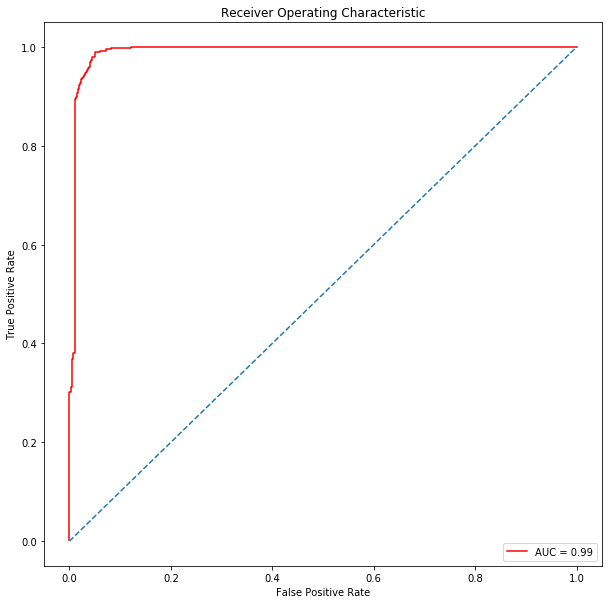

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [30]:
# 2) Logistic Regression (Tuned model)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model = LogisticRegression()

tuned_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2']
}

- L1 and L2 are regularization parameters. They're used to avoid overfiting. Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.
- L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where L2 is second moment norm corresponding to Euclidean Distance that is |x1-x2|^2 (|w|^2 for regularization case).
- In simple words, L2 (Ridge) shrinks all the coefficient by the same proportions but eliminates none, while L1 (Lasso) can shrink some coefficients to zero, performing variable selection.
- If all the features are correlated with the label, ridge outperforms lasso, as the coefficients are never zero in ridge.
- If only a subset of features are correlated with the label, lasso outperforms ridge as in lasso model some coefficient can be shrunken to zero.

In [31]:
# Taking a look at the correlation
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [32]:
# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of
# parameter values specified with the tuned_parameter. The GridSearchCV instance implements
# the usual estimator API: when “fitting” it on a dataset all the possible combinations of
# parameter values are evaluated and the best combination is retained.

from sklearn.model_selection import GridSearchCV

LR = GridSearchCV(LR_model, tuned_parameters, cv=10)

LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l1'}


In [34]:
# This will give you positive class prediction probabilities
y_prob = LR.predict_proba(X_test)[:,1]

# This will threshold the probabilities to give class predictions
y_pred = np.where(y_prob > 0.5, 1, 0)

LR.score(X_test, y_pred)

1.0

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]], dtype=int64)

In [37]:
auc_roc = metrics.classification_report(y_test, y_pred)
print(auc_roc)

             precision    recall  f1-score   support

          0       0.97      0.98      0.97       845
          1       0.97      0.97      0.97       780

avg / total       0.97      0.97      0.97      1625



In [38]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9728303747534518

In [39]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9916325292064937

Text(0.5,0,'False Positive Rate')

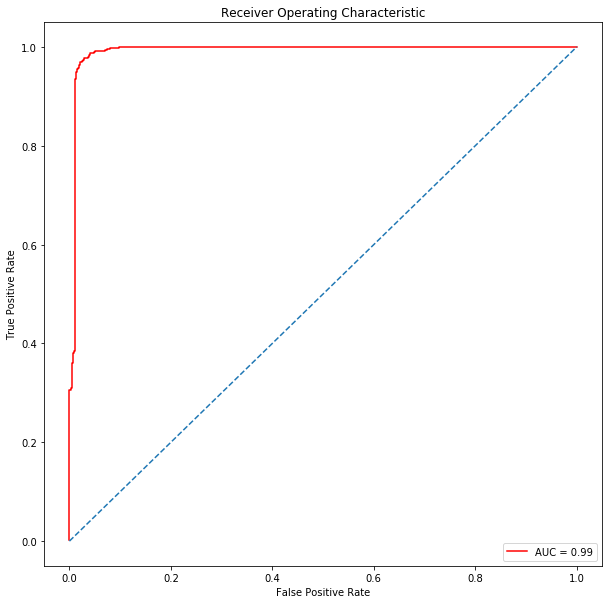

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [41]:
LR_ridge = LogisticRegression(penalty='l2')

LR_ridge.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [43]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [44]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       845
          1       0.96      0.95      0.96       780

avg / total       0.96      0.96      0.96      1625



In [45]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9579388560157791

In [46]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99029889242907

Text(0.5,0,'False Positive Rate')

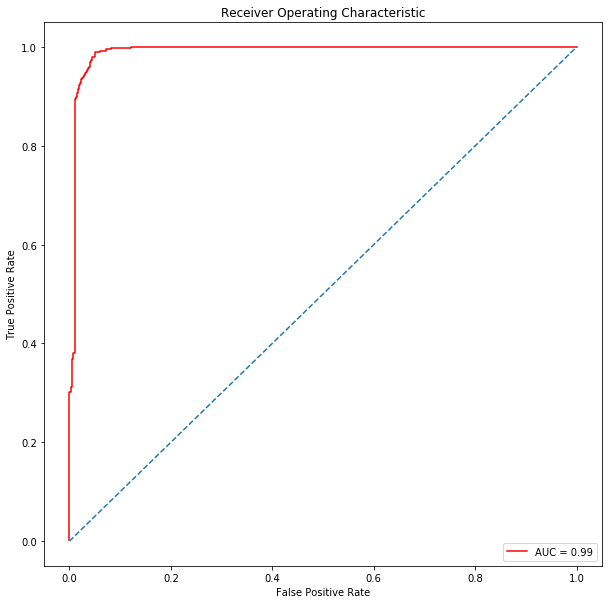

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [48]:
# 3) Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [49]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [50]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 1625 points : 111


In [51]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores)

[0.59778598 0.78843788 0.97908979 0.9803198  0.84870849 0.81303813
 0.81034483 0.81650246 0.85326757 0.97533909]


In [52]:
scores.mean()

0.8462834022887495

In [53]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[786,  59],
       [ 52, 728]], dtype=int64)

In [54]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

             precision    recall  f1-score   support

          0       0.94      0.93      0.93       845
          1       0.93      0.93      0.93       780

avg / total       0.93      0.93      0.93      1625



In [55]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9317554240631164

In [56]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592201486876043

Text(0.5,0,'False Positive Rate')

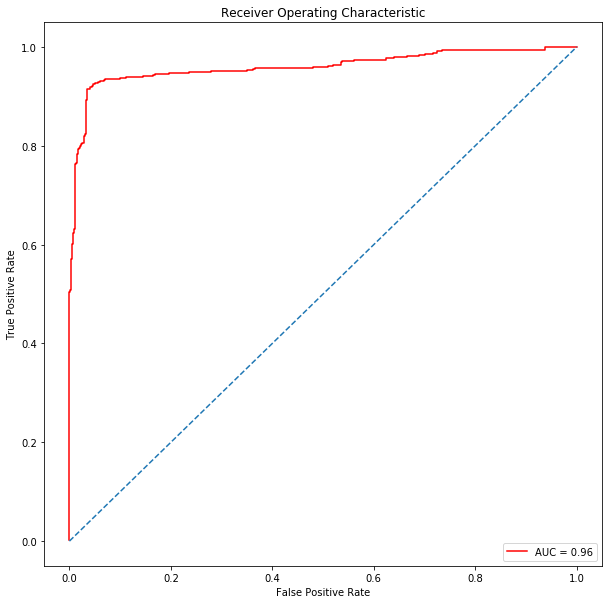

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [59]:
# 4) Support Vector Machine

from sklearn.svm import SVC
svm_model = SVC()

In [60]:
# 4.1) Support Vector Machine without polynomial kernel

tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
}

from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters, cv=10, scoring='accuracy', n_iter=20)

In [61]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [62]:
print(model_svm.grid_scores_)

[mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 500}, mean: 0.96046, std: 0.00611, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 500}, mean: 0.94738, std: 0.00972, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 1}, mean: 0.95738, std: 0.00848, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}, mean: 0.94784, std: 0.00840, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 500}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 500}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.01, 'C': 500}, mean: 1.00000, std: 0.00000, params

In [63]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [64]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [65]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [66]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625



In [67]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5,0,'False Positive Rate')

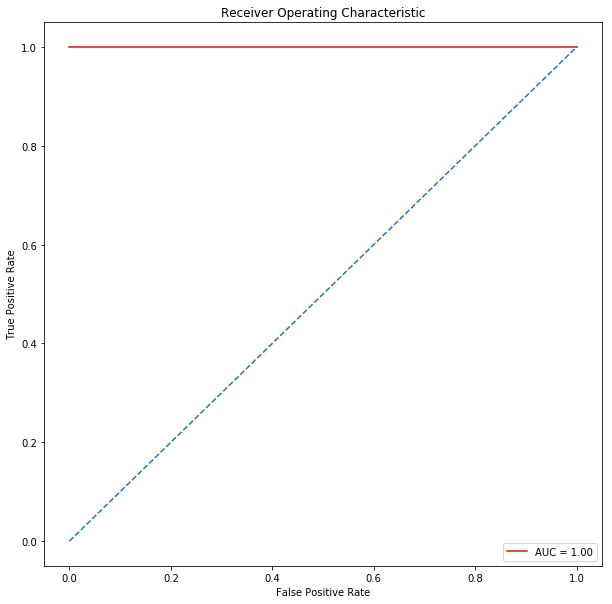

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [70]:
# 4.2) Support Vector machine with polynomial Kernel

tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
}

# ...

In [71]:
# 5) Trying default model

from sklearn.ensemble import RandomForestClassifier

model_RR = RandomForestClassifier()

#tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    #'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    #}

In [72]:
model_RR.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# ...

In [74]:
# 6) Default Decision Tree model

from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [75]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
# ...

In [77]:
# 7) Neural Network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)